In [1]:
import random 
from env import StaticGridEnv
import numpy as np
import matplotlib.pyplot as plt

#seeding for reproducibility
random.seed(42)

#environment variables
numActions = 4
validActions = [0, 1, 2, 3]
numStates = 10*10 #10x10 grid

#setting up Q-table


pygame 2.6.1 (SDL 2.30.7, Python 3.12.2)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
def plotCumulativeReward(cumulativeReward):
    plt.plot(cumulativeReward)
    plt.xlabel('Episodes')
    plt.ylabel('Cumulative Reward')
    plt.title('Cumulative Reward vs Episodes')
    plt.show()

def calculateSuccessRate(numSuccess, numEpisodes):
    successRate = (numSuccess / numEpisodes) * 100
    print('Success Rate: ', successRate, '%')
    return successRate
    
    
def calculateAverageLearningSpeed(stepsPerEpisode):
    averageLearningSpeed = 1 / np.mean(stepsPerEpisode)
    print('Average Learning Speed: ', averageLearningSpeed)
    return averageLearningSpeed

def calculateAverageRewardPerEpisode(totalRewardsPerEpisode):
    averageRewardPerEpisode = np.mean(totalRewardsPerEpisode)
    print('Average Reward Per Episode: ', averageRewardPerEpisode)
    return averageRewardPerEpisode

Episode:  0
0  not successful
Episode:  1
1  not successful
Episode:  2
2  not successful
Episode:  3
3  successful
3  not successful
Episode:  4
4  successful
4  not successful
Episode:  5
5  not successful
Episode:  6
6  not successful
Episode:  7
7  not successful
Episode:  8
8  not successful
Episode:  9
9  successful
9  not successful
Episode:  10
10  successful
10  not successful
Episode:  11
11  successful
11  not successful
Episode:  12
12  not successful
Episode:  13
13  successful
13  not successful
Episode:  14
14  successful
14  not successful
Episode:  15
15  successful
15  not successful
Episode:  16
16  not successful
Episode:  17
17  successful
17  not successful
Episode:  18
18  successful
18  not successful
Episode:  19
19  successful
19  not successful
Episode:  20
20  successful
20  not successful
Episode:  21
21  successful
21  not successful
Episode:  22
22  successful
22  not successful
Episode:  23
23  successful
23  not successful
Episode:  24
24  successful
24

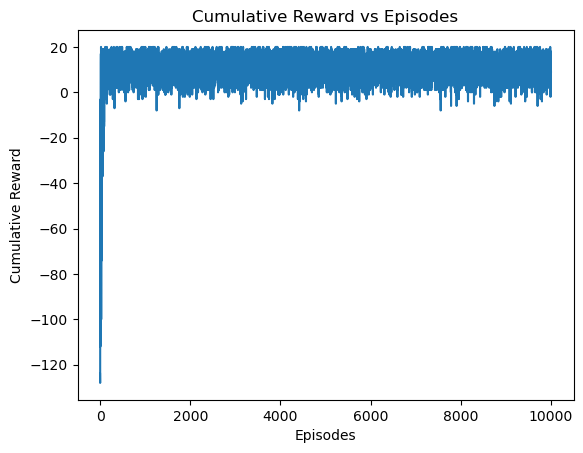

Total Rewards per Episode: [-124, -112, -128, -65, -64, -100, -112, -100, -100, -8, -55, -36, -104, -3, -10, -7, -100, 13, 17, -33, -18, 20, 14, -26, 14, -100, -55, 11, -10, 16, -1, 2, 4, 13, 15, 8, -57, 19, 19, -13, 15, -74, 17, -52, 12, -5, 9, 17, 17, 16, -25, 13, 14, 8, 8, -37, -23, -16, 18, 15, 11, 0, 6, 13, 10, 8, 3, 13, -5, 18, 17, -23, 19, 12, 7, 15, 13, -26, 19, 11, 14, -18, 12, 8, -16, 4, 3, -13, 9, 9, -15, -12, 10, 14, 10, -2, 13, 10, 7, 8, 16, 8, 2, 12, 4, 10, 7, 16, 9, -3, 10, 10, 11, 20, 4, 3, 13, 11, 13, 15, 5, 3, 13, 13, 8, 11, 10, 10, 14, 1, 7, 11, 16, -1, 0, 10, 6, 9, 4, -3, 9, 6, 2, 10, 7, 14, 7, 1, 8, 4, -5, 20, 13, 12, 9, 14, 5, 9, 10, 1, 14, 18, 6, 8, 19, 15, 10, 11, 14, 11, 17, 8, 9, 7, 14, 13, 11, 4, 16, 2, 12, 6, 8, 18, 12, 13, 15, 8, 3, 6, 18, 5, 13, 12, 8, 9, 14, 7, 5, 13, 3, 13, 12, 5, 11, 10, 8, 12, 11, 10, 5, 11, 3, 5, 5, -1, 17, 6, 4, 8, 19, 11, 9, 12, 16, 9, 10, 11, 10, 13, 12, 5, -1, 4, 16, 7, 15, 7, 5, 6, 16, 3, 10, 7, 10, 10, 7, 6, 10, 15, 11, 18, 8, 8

In [3]:
# Initialize the environment
env = StaticGridEnv(42)


q = np.zeros((numStates, numActions))

# Params
#epsilon = 1.0
epsilon = 0.1
maxEpsilon = 1.0
minEpsilon = 0.01
decay_rate = 0.01

alpha = 0.8    # Learning rate
gamma = 0.95   # Discount factor
num_episodes = 10000
max_steps_per_episode = 100


# Metrics
total_rewards_per_episode = []
steps_per_episode = []
successful_episodes = 0

for episode in range(num_episodes):
    print(f"Episode: ", episode)
    twodimState = env.reset()
    state = twodimState[0]*10 + twodimState[1]
    done = False
    total_rewards = 0
    steps = 0
    action = 0
    
    
    for step in range(max_steps_per_episode):
        # Choose an action (epsilon-greedy policy)
        if random.uniform(0, 1) > epsilon: # Exploit
            #print(q[state, :])
            #print(np.argmax(q[state, :]))
            action =  np.argmax(q[state, :])
        else: # Explore
            action = random.choice(validActions)

        # Take the action
        next_stateTwoDim, reward, done, _ = env.step(action)
        nextState = next_stateTwoDim[0]*10 + next_stateTwoDim[1]

        # Update Q-table
        q[state, action] = q[state, action] + alpha * (reward + gamma * np.max(q[nextState, :]) - q[state, action])

        # Update metrics
        total_rewards += reward
        steps += 1

        # Render the environment (optional)
        #env.render(episode=episode, learning_type="Q-learning")

        # Transition to the next state
        twodimState = next_stateTwoDim
        state = nextState

        if done:
            successful_episodes += 1
            print(episode, " successful" )
            break

    # Track metrics
    total_rewards_per_episode.append(total_rewards)
    steps_per_episode.append(steps)

    # Decay epsilon
    #epsilon = minEpsilon + (maxEpsilon - minEpsilon) * np.exp(-decay_rate*episode)
    
    print(episode, " not successful" )



# Close the environment
env.close()

# Calculate metrics
successRate = calculateSuccessRate(successful_episodes, num_episodes)
averageRewardPerEpisode = calculateAverageRewardPerEpisode(total_rewards_per_episode)
averageLearningSpeed = calculateAverageLearningSpeed(steps_per_episode)

# Save metrics to a file
with open("metricsQ.txt", "w") as f:
    f.write(f"Success Rate: {successRate}%\n")
    f.write(f"Average Reward per Episode: {averageRewardPerEpisode}\n")
    f.write(f"Average Learning Speed: {averageLearningSpeed}\n")

# Plot cumulative reward
plotCumulativeReward(total_rewards_per_episode)

# Print metrics
print(f"Total Rewards per Episode: {total_rewards_per_episode}")
print(f"Steps per Episode: {steps_per_episode}")
print(f"Number of Successful Episodes: {successful_episodes}")

Episode:  0
0  not successful
Episode:  1
1  not successful
Episode:  2
2  not successful
Episode:  3
3  not successful
Episode:  4
4  not successful
Episode:  5
5  not successful
Episode:  6
6  not successful
Episode:  7
7  successful
7  not successful
Episode:  8
8  not successful
Episode:  9
9  not successful
Episode:  10
10  successful
10  not successful
Episode:  11
11  successful
11  not successful
Episode:  12
12  successful
12  not successful
Episode:  13
13  successful
13  not successful
Episode:  14
14  not successful
Episode:  15
15  not successful
Episode:  16
16  successful
16  not successful
Episode:  17
17  successful
17  not successful
Episode:  18
18  successful
18  not successful
Episode:  19
19  not successful
Episode:  20
20  successful
20  not successful
Episode:  21
21  successful
21  not successful
Episode:  22
22  successful
22  not successful
Episode:  23
23  not successful
Episode:  24
24  successful
24  not successful
Episode:  25
25  not successful
Episode: 

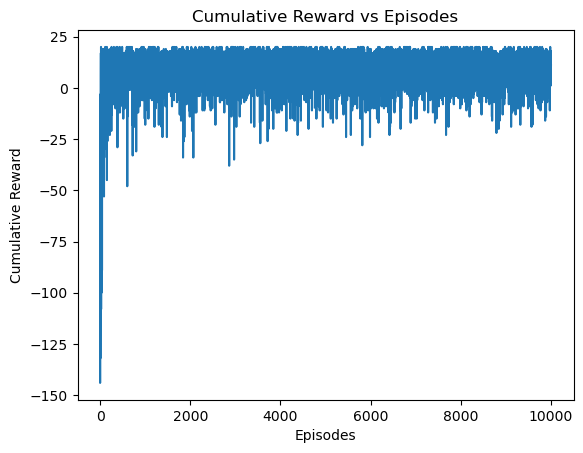

Total Rewards per Episode: [-132, -144, -112, -116, -100, -104, -132, -16, -108, -104, -30, -3, -60, -42, -100, -108, -65, -25, 17, -104, 6, 20, -37, -108, 14, -108, -41, -13, -70, 14, -3, -100, 4, -11, 17, 13, -57, 17, 19, -39, 17, -16, 17, -89, 11, -15, 14, 16, 17, 18, -51, 15, 14, 4, -40, -11, -5, -37, 14, 15, 11, -10, -3, 13, -4, 8, 7, 15, 11, 15, 17, -27, 19, 0, 11, 13, 9, -9, 19, 1, 14, -5, 13, 6, -52, 1, -5, -53, 1, 11, -11, -30, 14, 12, 8, 4, 15, 2, 7, 4, 16, -2, -6, 3, -12, 12, 7, 14, 9, -11, 4, 16, 11, 20, 4, -3, 11, 1, 11, 15, 10, -4, 7, 1, 8, 7, -4, 10, 14, -2, -10, 11, 16, 3, -5, 8, 6, 13, 0, -3, 9, 6, -3, 8, 13, 8, 3, 1, -34, -25, -11, 20, -45, -2, -5, -7, 4, -11, -11, 7, 8, 16, 12, -26, 19, 17, 0, 7, 14, 13, 15, 5, 13, 5, 14, 1, 11, 8, 14, -7, -7, 2, 8, 18, 12, 9, 15, 8, 10, 5, 18, 7, 13, 14, 8, 7, 16, 3, 5, 13, -8, 13, 10, 7, 11, 0, 4, 14, 13, -5, 4, -12, 1, 5, 7, -3, 18, -23, -1, -4, 19, -3, 9, 9, 12, 11, 14, 7, 13, 11, 12, 5, 7, 9, 16, 5, 15, 7, 9, 6, 8, 5, 12, 11, 10

In [4]:


envSarsa = StaticGridEnv(42)


sarsa = np.zeros((numStates, numActions))


# Params
#epsilon = 1.0
epsilonS = 0.1
maxEpsilonS = 1.0
minEpsilonS = 0.01
decay_rateS = 0.01

alphaS = 0.8    # Learning rate
gammaS = 0.95   # Discount factor
num_episodesS = 10000
max_steps_per_episodeS = 100


# Metrics
total_rewards_per_episodeS = []
steps_per_episodeS = []
successful_episodesS = 0

for episode in range(num_episodesS):
    print(f"Episode: ", episode)
    twodimState = env.reset()
    state = twodimState[0]*10 + twodimState[1]
    done = False
    total_rewards = 0
    steps = 0
    action = 0
    nextAction = 0
    
    
    # Choose an action (epsilon-greedy policy)
    if random.uniform(0, 1) > epsilonS: # Exploit
        #print(q[state, :])
        #print(np.argmax(q[state, :]))
        action =  np.argmax(sarsa[state, :])
    else: # Explore
        action = random.choice(validActions)
    
    for step in range(max_steps_per_episodeS):
        

        # Take the action
        next_stateTwoDim, reward, done, _ = env.step(action)
        nextState = next_stateTwoDim[0]*10 + next_stateTwoDim[1]
        
        if random.uniform(0, 1) > epsilonS: # Exploit
            nextAction =  np.argmax(sarsa[nextState, :])
        else: # Explore
            nextAction = random.choice(validActions)

        # Update Q-table
        sarsa[state, action] = sarsa[state, action] + alpha * (reward + gamma * sarsa[nextState, nextAction] - sarsa[state, action])

        # Update metrics
        total_rewards += reward
        steps += 1

        # Render the environment (optional)
        #env.render(episode=episode, learning_type="Q-learning")

        # Transition to the next state
        twodimState = next_stateTwoDim
        state = nextState
        action = nextAction

        if done:
            successful_episodesS += 1
            print(episode, " successful" )
            break

    # Track metrics
    total_rewards_per_episodeS.append(total_rewards)
    steps_per_episodeS.append(steps)

    # Decay epsilon
    #epsilon = minEpsilon + (maxEpsilon - minEpsilon) * np.exp(-decay_rate*episode)
    
    print(episode, " not successful" )



# Close the environment
env.close()

# Calculate metrics
successRateS = calculateSuccessRate(successful_episodesS, num_episodesS)
averageRewardPerEpisodeS = calculateAverageRewardPerEpisode(total_rewards_per_episodeS)
averageLearningSpeedS = calculateAverageLearningSpeed(steps_per_episodeS)

# Save metrics to a file
with open("metricsS.txt", "w") as f:
    f.write(f"Success Rate: {successRateS}%\n")
    f.write(f"Average Reward per Episode: {averageRewardPerEpisodeS}\n")
    f.write(f"Average Learning Speed: {averageLearningSpeedS}\n")

# Plot cumulative reward
plotCumulativeReward(total_rewards_per_episodeS)

# Print metrics
print(f"Total Rewards per Episode: {total_rewards_per_episodeS}")
print(f"Steps per Episode: {steps_per_episodeS}")
print(f"Number of Successful Episodes: {successful_episodesS}")

